In [6]:
%pip install pandas openpyxl matplotlib request

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import requests

url = 'https://raw.githubusercontent.com/Alerota22/DSLAB/main/Freedom_in_the_world_2013-2024.xlsx'
response = requests.get(url)

# Salva il file su Colab
with open('Freedom_in_the_world_2013-2024.xlsx', 'wb') as f:
    f.write(response.content)

# Leggi il file usando Pandas
df = pd.read_excel('Freedom_in_the_world_2013-2024.xlsx', sheet_name='FIW13-24', engine='openpyxl')
print(df.head())

  Freedom in the World 2013-2024 Raw Data Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                       Country/Territory     Region        C/T    Edition   
1                                Abkhazia    Eurasia          t       2024   
2                             Afghanistan       Asia          c       2024   
3                                 Albania     Europe          c       2024   
4                                 Algeria     Africa          c       2024   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0     Status  PR rating  CL rating         A1         A2         A3  ...   
1         PF          5          5          2          2          1  ...   
2         NF          7          7          0          0          0  ...   
3         PF          3          3          3          3          3  ...   
4         NF          6          5          1          1          1  ...   

  Unnamed: 34 Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 

In [10]:
#Pulizia delle intestazione duplicate

df_cleaned = df.drop(0)
df_cleaned.columns = df.iloc[0]
df_cleaned = df_cleaned.reset_index(drop=True)

# Conversione delle colonne numeriche
numeric_columns = ['PR rating', 'CL rating', 'A1', 'A2', 'A3', 'F3', 'F4', 'F', 'G1', 'G2', 'G3', 'G4', 'CL', 'Total']
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Statistiche descrittive
df_cleaned[numeric_columns].describe()

,PR rating,CL rating,A1,A2,A3,F3,F4,F,G1,G2,G3,G4,CL,Total
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,3.614712,3.481113,2.382903,2.501392,2.365408,1.993241,1.835388,7.800795,2.619881,2.357455,2.289861,1.994036,34.733201,57.365805
std,2.226768,1.944727,1.630832,1.541877,1.435319,1.387649,1.099984,4.947826,1.266201,1.108233,1.050759,1.060409,17.234519,30.518363
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000,20.000000,30.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,7.000000,3.000000,2.000000,2.000000,2.000000,35.000000,61.000000
75%,6.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,12.000000,4.000000,3.000000,3.000000,3.000000,51.000000,87.000000
max,7.000000,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,16.000000,4.000000,4.000000,4.000000,4.000000,60.000000,100.000000


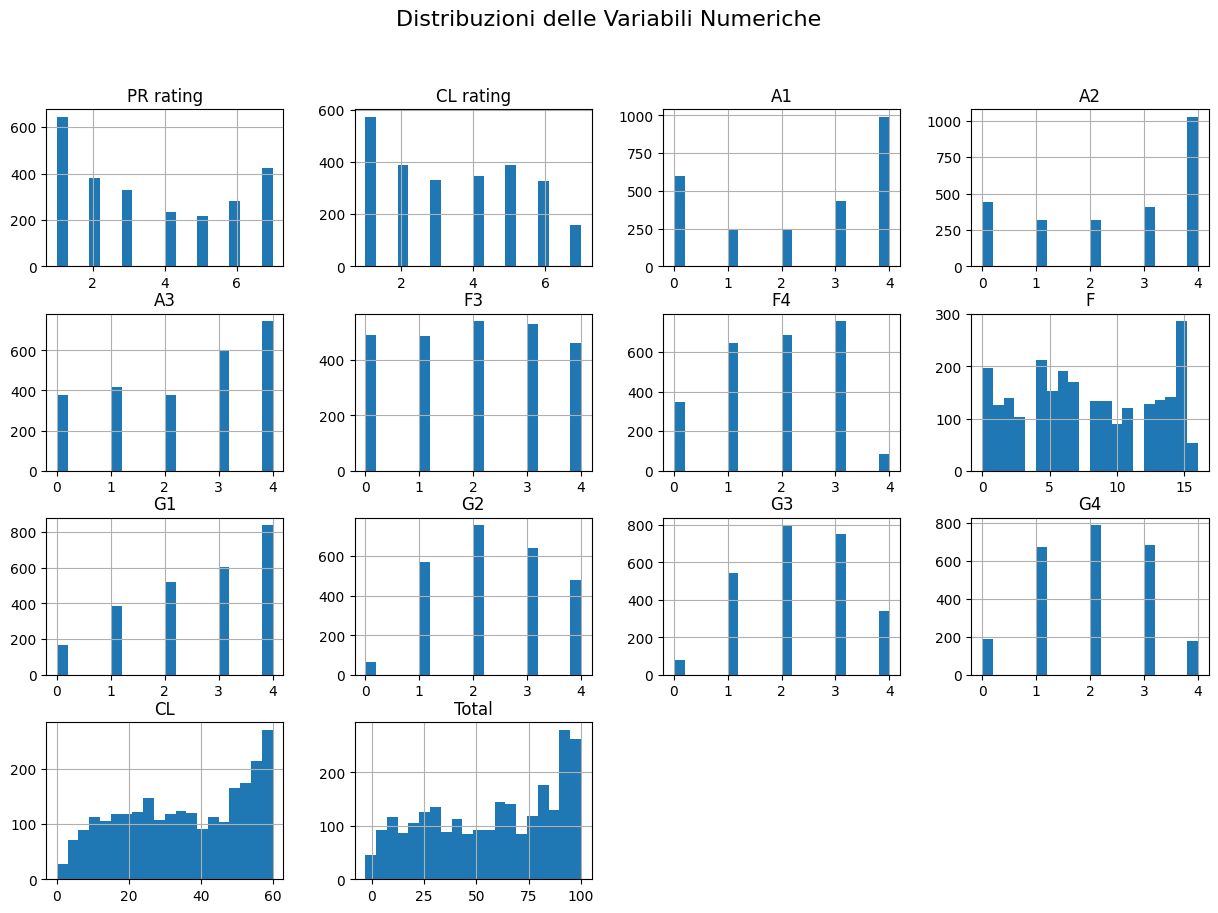

In [9]:
import matplotlib.pyplot as plt

# Istogrammi per le variabili numeriche
df_cleaned[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuzioni delle Variabili Numeriche', fontsize=16)
plt.show()